In [1]:
# imports
from scipy.interpolate import PchipInterpolator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def index_to_risk_score(level_0, level_30, level_70, level_100, index_values):
    """
    Convert an index value to a score (between 0 and 100) given defined boundaries for the score conversion
    @param level_0: maximum index value for which a score should be 0
    @param level_30: index value for which a score should be 30
    @param level_70: index value for which a score should be 70
    @param level_100: minimum index value for which a score should be 100
    @param index_value: the index value which is converted to a score
    """
    points = [[0, 0], [level_0, 0], [level_30, 30], [level_70, 70], [level_100, 100], [100, 100]]
    points_without_duplicates = []
    [points_without_duplicates.append(x) for x in points if x not in points_without_duplicates]
    points = np.array(points_without_duplicates)
    interpolator = PchipInterpolator(points[:,0], points[:,1])
    return interpolator(index_values)

In [3]:
def plot_diagram(xpoints, ypoints, title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(xpoints, ypoints, color="black")
    plt.xlim(0, 35)
    plt.ylim(0)
    plt.axhspan(70, 100, facecolor='r', alpha=0.3, label="high risk")
    plt.axhspan(30, 70, facecolor='orange', alpha=0.3, label="intermediate risk")
    plt.axhspan(0, 30, facecolor='g', alpha=0.3, label="low risk")
    plt.legend(loc= "lower right")
    plt.show()

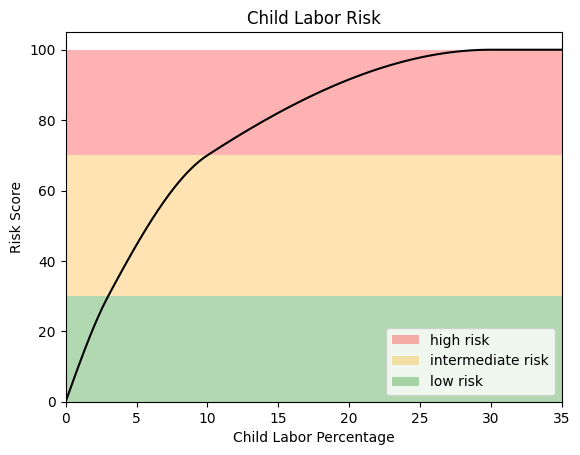

In [5]:
xpoints = np.arange(0, 100, 0.1)
ypoints = index_to_risk_score(0, 3, 10, 30, xpoints)
plot_diagram(xpoints, ypoints, "Child Labor Risk", "Child Labor Percentage", "Risk Score")

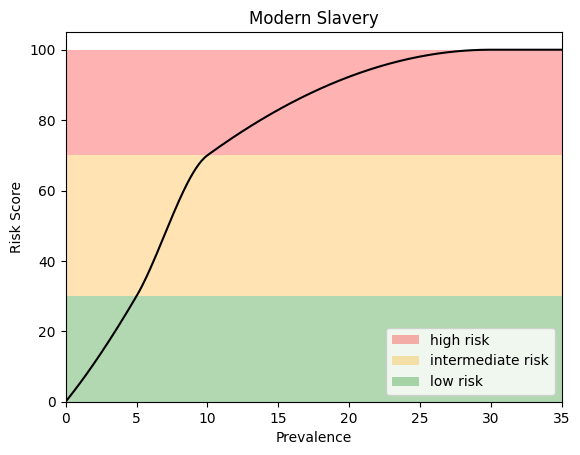

In [14]:
xpoints = np.arange(0, 100, 0.1)
ypoints = index_to_risk_score(0, 5, 10, 30, xpoints)
plot_diagram(xpoints, ypoints, "Modern Slavery", "Prevalence", "Risk Score")